## Big data.
### Libraries used:


In [1]:
import pyspark
from pyspark.sql.functions import * 
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('MapReduce').getOrCreate()
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string


23/03/14 21:41:15 WARN Utils: Your hostname, Isaacs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.66 instead (on interface en0)
23/03/14 21:41:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/14 21:41:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Implementing map-reduce 

On this section, we'll implement map-reduce to the following texts

In [2]:
texts = [
    'problem solving skills are not something that can be distilled down into a single step-by-step process',
    'testing involves finding, designing, and developing test cases: actual instances of the problem that can be used to test your solution.'
    'computer hardware usually refers to the physical components in a compu5ng system which includes input devices such as a mouse/touchpad, keyboard, or touchscreen, output devices such as monitors, storage devices such as hard disks and solid-state drives, as well as the electronic components such as graphics cards, main memory, motherboards, and chips that make up the central processing unit (CPU)'
    'a program may contain many functions and pieces of code, but this special func5on is defined as the one that gets invoked when a program starts',
    'good code is not just functional, it is also beau5ful, good code is organized, easy to read, and well documented, organization can be achieved by separating code into useful functions and collecting functions into modules or libraries, good organization means that at any one time, we only need to focus on a small part of a program'
    'it would be difficult to read an essay that contained random line breaks, paragraphs were not indented, it contained different spacing or different fonts, etcetera, likewise, code should be legible, well wriLen code is consistent and makes good use of whitespace and indentation, code within the same code block should be indented at the same level, nested blocks should be further indented just like the outline of an essay or table of contents'
]

Time to create an RDD and "flat" out text, RDD stands for _Resilient Distributed Datasets_

In [3]:
rdd_texts = spark.sparkContext.parallelize(texts)

for paragraph in rdd_texts.collect():
    print(paragraph)

problem solving skills are not something that can be distilled down into a single step-by-step process
testing involves finding, designing, and developing test cases: actual instances of the problem that can be used to test your solution.computer hardware usually refers to the physical components in a compu5ng system which includes input devices such as a mouse/touchpad, keyboard, or touchscreen, output devices such as monitors, storage devices such as hard disks and solid-state drives, as well as the electronic components such as graphics cards, main memory, motherboards, and chips that make up the central processing unit (CPU)a program may contain many functions and pieces of code, but this special func5on is defined as the one that gets invoked when a program starts
good code is not just functional, it is also beau5ful, good code is organized, easy to read, and well documented, organization can be achieved by separating code into useful functions and collecting functions into module

In [4]:
rdd_words = rdd_texts.flatMap(lambda paragraph: paragraph.split(' ') )
histogram = rdd_words.map(lambda word: (word, 1)) \
                                  .reduceByKey(lambda a, b: a + b) \
                                  .sortBy(lambda x: x[1], ascending = False) \
                                  .collect()
print ("{:<10} {:<10}".format('Palabra', 'Frecuencia'))

for word, frequency in histogram:
  print ("{:<10} {:<10}".format(word, frequency))

Error processing line 3 of /Users/isaacfernandez/opt/anaconda3/lib/python3.9/site-packages/googleapis_common_protos-1.56.3-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "/Users/isaacfernandez/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


Palabra    Frecuencia
and        8         
the        8         
as         7         
be         7         
code       7         
of         6         
that       6         
a          6         
to         5         
is         5         
good       4         
such       4         
or         4         
devices    3         
functions  3         
well       3         
should     3         
into       3         
not        3         
can        3         
components 2         
an         2         
indented   2         
just       2         
at         2         
it         2         
organization 2         
essay      2         
contained  2         
different  2         
program    2         
test       2         
problem    2         
one        2         
same       2         
are        1         
something  1         
process    1         
involves   1         
developing 1         
cases:     1         
hardware   1         
refers     1         
input      1         
(CPU)a  

In [5]:
rdd_map = rdd_words.map(lambda x:(x,1))
rdd_histogram = rdd_map.reduceByKey(lambda a, b: a + b)

In [6]:
rdd_map.take(5)

[('problem', 1), ('solving', 1), ('skills', 1), ('are', 1), ('not', 1)]

In [7]:
rdd_histogram.take(5)

[('are', 1),
 ('something', 1),
 ('process', 1),
 ('involves', 1),
 ('developing', 1)]

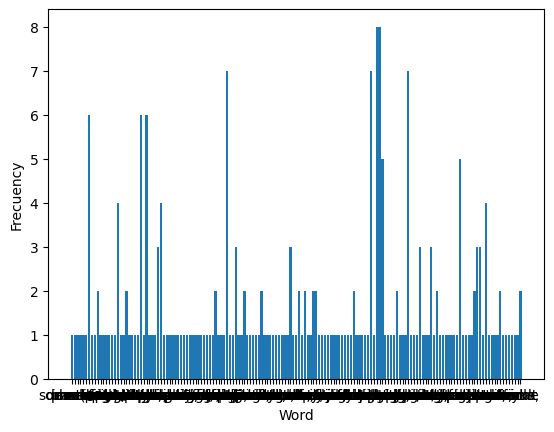

In [8]:
histogram_graph = rdd_histogram.collect()

words = [ x[0] for x in histogram_graph ]
frecuencies = [ x[1] for x in histogram_graph ]
plt.bar(words, frecuencies)
plt.xlabel('Word')
plt.ylabel('Frecuency')
plt.show()

Now, let us see a better visualization, considering the top 5 most used words.

In [9]:
top5_all_texts = []
for i in range(5):
    top5_all_texts.append((histogram[i]))

In [10]:
top5_all_texts

[('and', 8), ('the', 8), ('as', 7), ('be', 7), ('code', 7)]

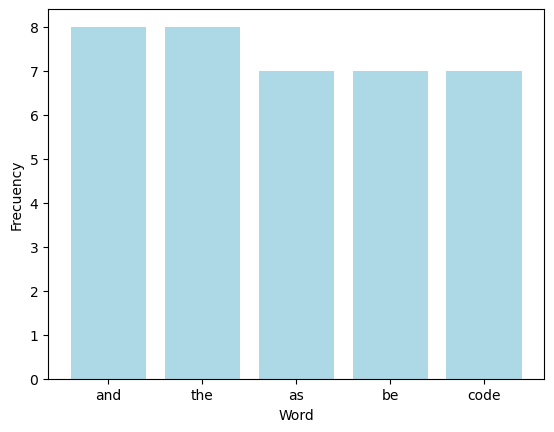

In [11]:
words = [ x[0] for x in top5_all_texts ]
frecuencies = [ x[1] for x in top5_all_texts ]
plt.bar(words, frecuencies,color=[ 'lightblue'])
plt.xlabel('Word')
plt.ylabel('Frecuency')
plt.show()

To compare our results, we will now consider the top 10,15 and 20 most used words. And verify if we can draw some conclusions from it.

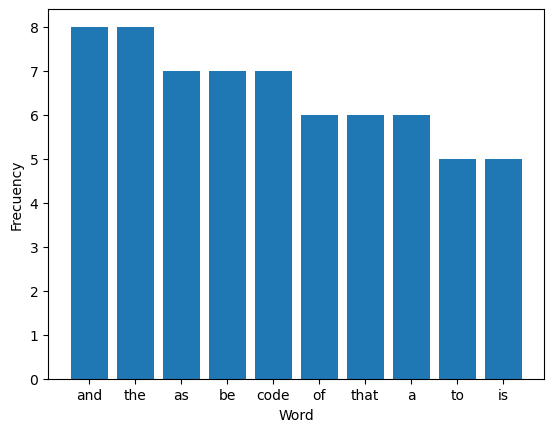

In [12]:
top10_all_texts = []
for i in range(10):
    top10_all_texts.append((histogram[i]))
words = [ x[0] for x in top10_all_texts ]
frecuencies = [ x[1] for x in top10_all_texts ]
plt.bar(words, frecuencies)
plt.xlabel('Word')
plt.ylabel('Frecuency')
plt.show()

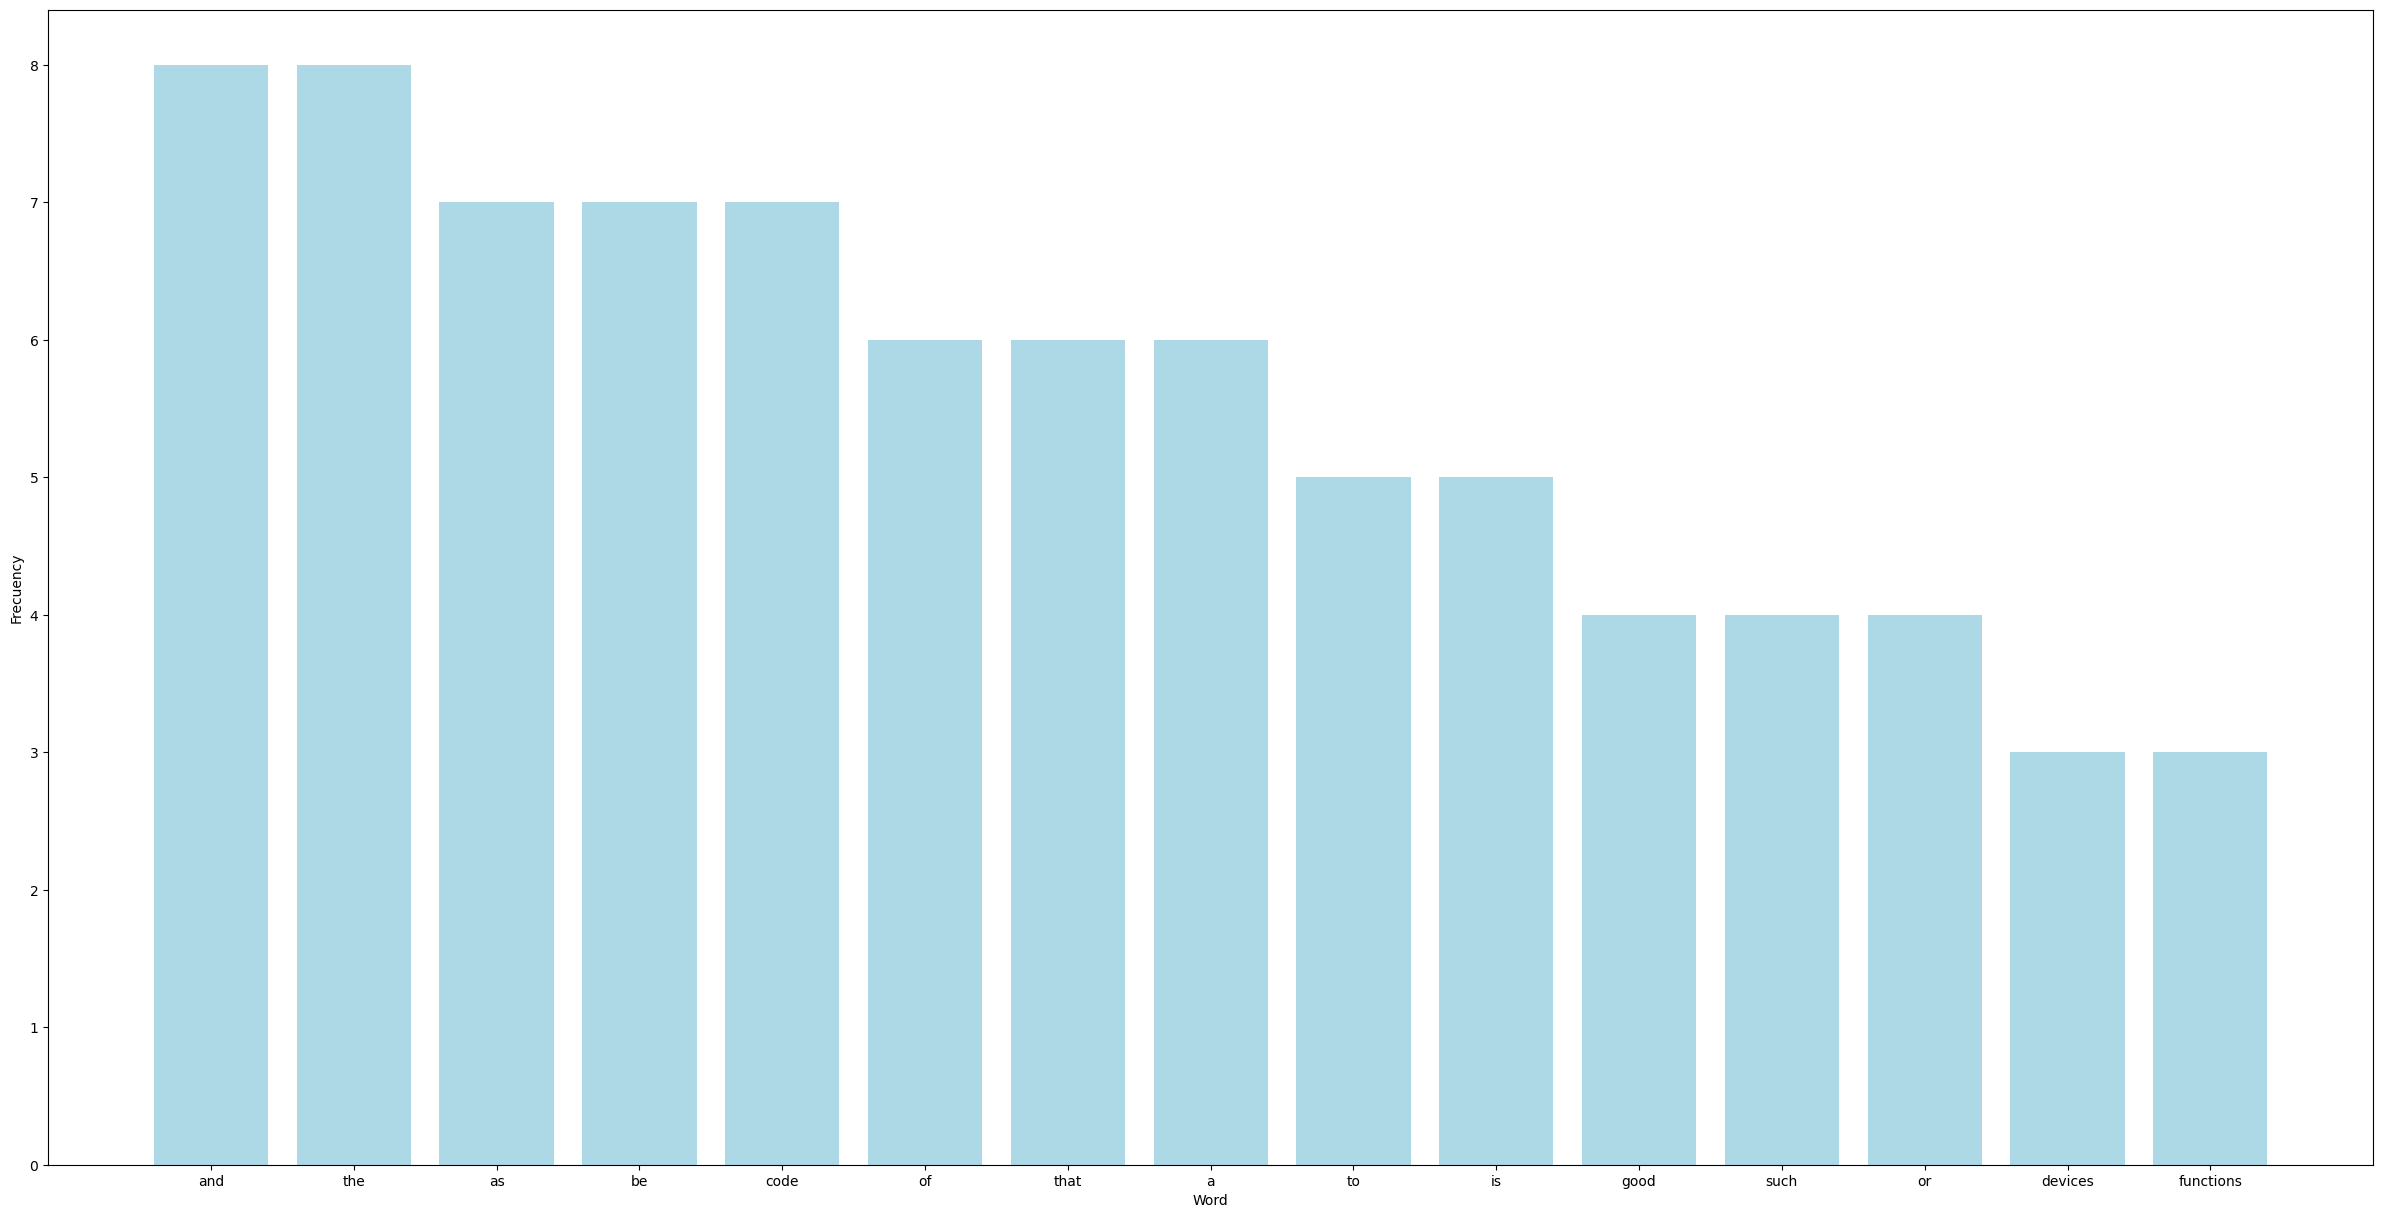

In [13]:
top15_all_texts = []
for i in range(15):
    top15_all_texts.append((histogram[i]))
words = [ x[0] for x in top15_all_texts ]
frecuencies = [ x[1] for x in top15_all_texts ]
plt.figure(figsize=(30, 15))
plt.bar(words, frecuencies, color = ['lightblue'])
plt.xlabel('Word')
plt.ylabel('Frecuency')
plt.show()


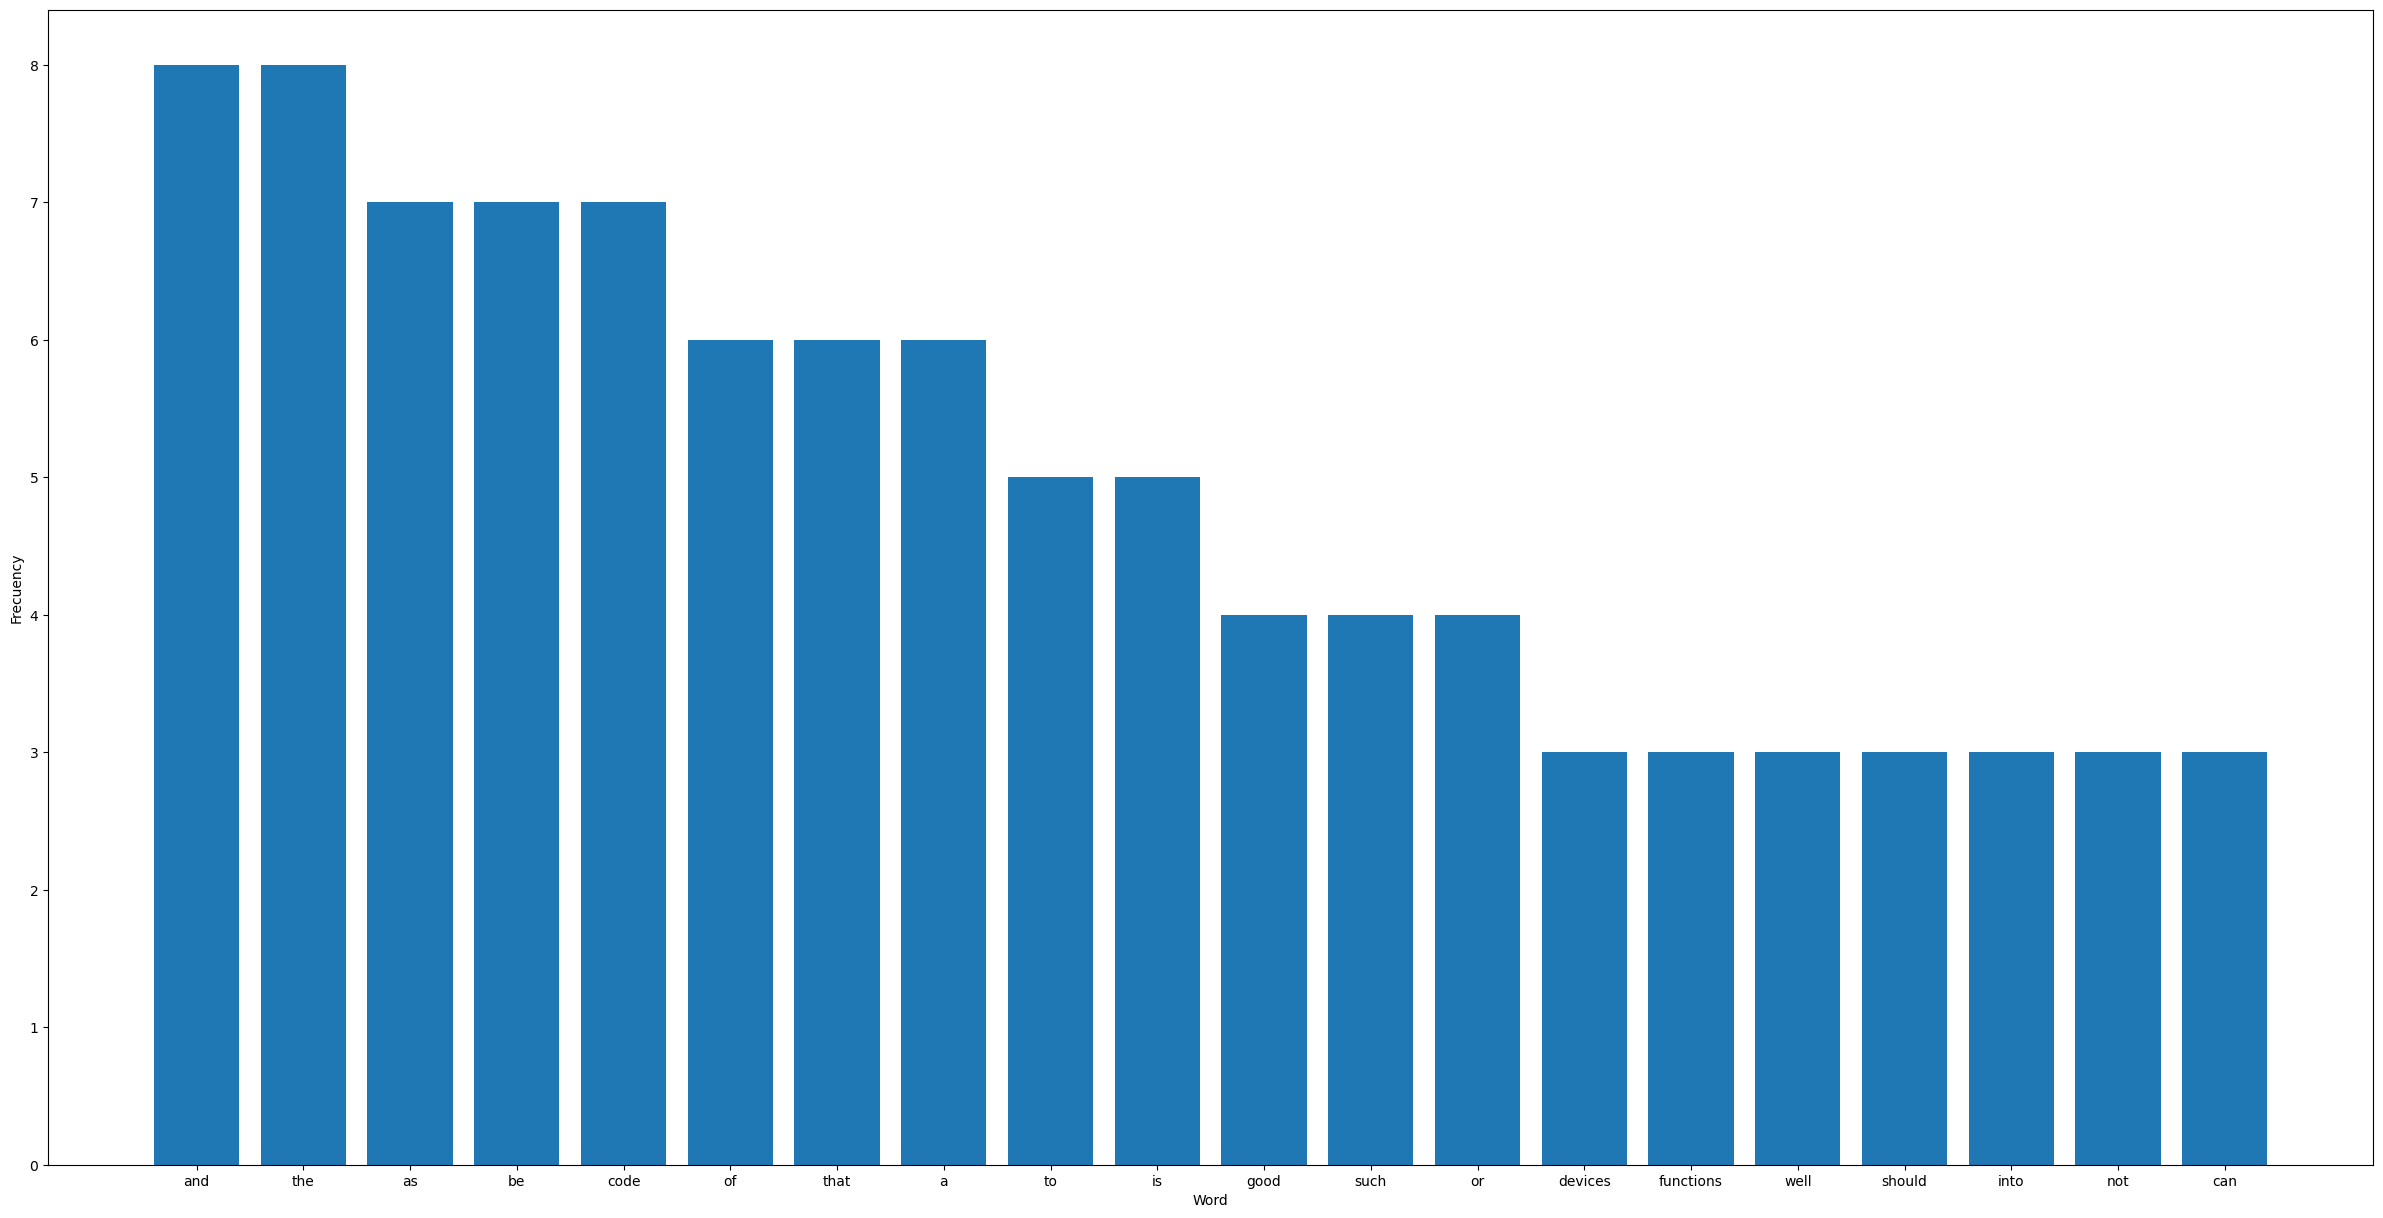

In [14]:
top20_all_texts = []
for i in range(20):
    top20_all_texts.append((histogram[i]))
words = [ x[0] for x in top20_all_texts ]
frecuencies = [ x[1] for x in top20_all_texts ]
plt.figure(figsize=(30, 15))
plt.bar(words, frecuencies)
plt.xlabel('Word')
plt.ylabel('Frecuency')
plt.show()


## Sentiment Analysis and the natural language toolkit

In [15]:
!pip install SentimentAnalysis

!pip install nltk
!pip install --upgrade pip
!python -m nltk.downloader all


!pip install keras tensorflow
     


Error processing line 3 of /Users/isaacfernandez/opt/anaconda3/lib/python3.9/site-packages/googleapis_common_protos-1.56.3-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "/Users/isaacfernandez/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Error processing line 3 of /Users/isaacfernandez/opt/anaconda3/lib/python3.9/site-packages/googleapis_common_protos-1.56.3-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "/Users/isaacfernandez/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Error processing

[nltk_data]    |   Package europarl_raw is already up-to-date!
[nltk_data]    | Downloading package extended_omw to
[nltk_data]    |     /Users/isaacfernandez/nltk_data...
[nltk_data]    |   Package extended_omw is already up-to-date!
[nltk_data]    | Downloading package floresta to
[nltk_data]    |     /Users/isaacfernandez/nltk_data...
[nltk_data]    |   Package floresta is already up-to-date!
[nltk_data]    | Downloading package framenet_v15 to
[nltk_data]    |     /Users/isaacfernandez/nltk_data...
[nltk_data]    |   Package framenet_v15 is already up-to-date!
[nltk_data]    | Downloading package framenet_v17 to
[nltk_data]    |     /Users/isaacfernandez/nltk_data...
[nltk_data]    |   Package framenet_v17 is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/isaacfernandez/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/isaacfernande

[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /Users/isaacfernandez/nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     /Users/isaacfernandez/nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /Users/isaacfernandez/nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package snowball_data to
[nltk_data]    |     /Users/isaacfernandez/nltk_data...
[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package spanish_grammars to
[nltk_data]    |     /Users/isaacfernandez/nltk_data...
[nltk_data]    |   Package spanish_grammars is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |   

In [16]:
rdd_amazon = spark.sparkContext.textFile('/Users/isaacfernandez/DS/6th semester/big data/amazon_alexa.csv').map(lambda x: x.split('*'))

for opinion in rdd_amazon.take(5):
  print(opinion)

['verified_reviews']
['Love my Echo!']
['Loved it!']
['"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home."']
['"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."']


In [29]:
rdd_description = spark.sparkContext.textFile('/Users/isaacfernandez/DS/6th semester/data quality/description.csv').map(lambda x: x.split('*'))

In [30]:
# Transformar textos a minúsculas
rdd_minus = rdd_amazon.map(lambda x: (x[0].lower()))

for letra in rdd_minus.take(5):
  print(letra)

verified_reviews
love my echo!
loved it!
"sometimes while playing a game, you can answer a question correctly but alexa says you got it wrong and answers the same as you.  i like being able to turn lights on and off while away from home."
"i have had a lot of fun with this thing. my 4 yr old learns about dinosaurs, i control the lights and play games like categories. has nice sound when playing music as well."


In [31]:
# Transformar textos a minúsculas
rdd_minus = rdd_description.map(lambda x: (x[0].lower()))

for letra in rdd_minus.take(5):
  print(letra)

verified_reviews
"i am a data science student with a profound passion for technology and knowledge. i believe artificial intelligence will drive an astonishing revolution for mankind, in every possible way. being a part of it, is one my greatest drives. openness is the greatest trait of my personality, i am always willing to learn. "


In [32]:
# Para poder tratar con el texto a nivel de palabras debemos hacer lo siguiente
rdd_palabras = rdd_minus.map(lambda x: (x.split(' ')))

for letra in rdd_palabras.take(5):
  print(letra)

['verified_reviews']
['"i', 'am', 'a', 'data', 'science', 'student', 'with', 'a', 'profound', 'passion', 'for', 'technology', 'and', 'knowledge.', 'i', 'believe', 'artificial', 'intelligence', 'will', 'drive', 'an', 'astonishing', 'revolution', 'for', 'mankind,', 'in', 'every', 'possible', 'way.', 'being', 'a', 'part', 'of', 'it,', 'is', 'one', 'my', 'greatest', 'drives.', 'openness', 'is', 'the', 'greatest', 'trait', 'of', 'my', 'personality,', 'i', 'am', 'always', 'willing', 'to', 'learn.', '"']


In [33]:
#Removemos stopwords (palabras vacias)
def removeStopWordsFunct(x):
    from nltk.corpus import stopwords
    stop_words=set(stopwords.words('english'))
    filteredSentence = [w for w in x if not w in stop_words]
    return filteredSentence

rdd_stop = rdd_palabras.map(removeStopWordsFunct)

for palabra in rdd_stop.take(10):
  print(palabra)

['verified_reviews']
['"i', 'data', 'science', 'student', 'profound', 'passion', 'technology', 'knowledge.', 'believe', 'artificial', 'intelligence', 'drive', 'astonishing', 'revolution', 'mankind,', 'every', 'possible', 'way.', 'part', 'it,', 'one', 'greatest', 'drives.', 'openness', 'greatest', 'trait', 'personality,', 'always', 'willing', 'learn.', '"']


In [34]:
#Eliminamos signos de puntuación y espacios en blanco
import string
def removePunctuationsFunct(x):
    list_punct=list(string.punctuation)
    filtered = [''.join(c for c in s if c not in list_punct) for s in x] 
    filtered_space = [s for s in filtered if s] #remove empty space 
    return filtered

rdd_punct = rdd_stop.map(removePunctuationsFunct)

for palabra in rdd_punct.take(10):
  print(palabra)

['verifiedreviews']
['i', 'data', 'science', 'student', 'profound', 'passion', 'technology', 'knowledge', 'believe', 'artificial', 'intelligence', 'drive', 'astonishing', 'revolution', 'mankind', 'every', 'possible', 'way', 'part', 'it', 'one', 'greatest', 'drives', 'openness', 'greatest', 'trait', 'personality', 'always', 'willing', 'learn', '']


In [35]:

#Vamos a extrer la frecuencia de las palabras más usadas
freqDistRDD = rdd_punct.flatMap(lambda x : nltk.FreqDist(x).most_common()).map(lambda x: x).reduceByKey(lambda x,y : x+y).sortBy(lambda x: x[1], ascending = False)

freqDistRDD.take(10)

[('greatest', 2),
 ('i', 1),
 ('science', 1),
 ('student', 1),
 ('passion', 1),
 ('technology', 1),
 ('knowledge', 1),
 ('believe', 1),
 ('artificial', 1),
 ('astonishing', 1)]

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentimentWordsFunct(x):
  analyzer = SentimentIntensityAnalyzer() 
  senti_list_temp = []
  for i in x:
    y = ''.join(i) 
    vs = analyzer.polarity_scores(y)
    senti_list_temp.append((y, vs))
    senti_list_temp = [w for w in senti_list_temp if w]
  sentiment_list  = []
  for j in senti_list_temp:
    first = j[0]
    second = j[1]
    
    for (k,v) in second.items():
      if k == 'compound':
        if v < 0.0:
          sentiment_list.append((first, "Negative"))
        elif v == 0.0:
          sentiment_list.append((first, "Neutral"))
        else:
          sentiment_list.append((first, "Positive"))
  return sentiment_list

sentimentRDD = rdd_punct.map(sentimentWordsFunct)
sentimentRDD.collect()

[[('verifiedreviews', 'Neutral')],
 [('i', 'Neutral'),
  ('data', 'Neutral'),
  ('science', 'Neutral'),
  ('student', 'Neutral'),
  ('profound', 'Neutral'),
  ('passion', 'Positive'),
  ('technology', 'Neutral'),
  ('knowledge', 'Neutral'),
  ('believe', 'Neutral'),
  ('artificial', 'Neutral'),
  ('intelligence', 'Positive'),
  ('drive', 'Neutral'),
  ('astonishing', 'Neutral'),
  ('revolution', 'Neutral'),
  ('mankind', 'Neutral'),
  ('every', 'Neutral'),
  ('possible', 'Neutral'),
  ('way', 'Neutral'),
  ('part', 'Neutral'),
  ('it', 'Neutral'),
  ('one', 'Neutral'),
  ('greatest', 'Positive'),
  ('drives', 'Neutral'),
  ('openness', 'Positive'),
  ('greatest', 'Positive'),
  ('trait', 'Neutral'),
  ('personality', 'Neutral'),
  ('always', 'Neutral'),
  ('willing', 'Neutral'),
  ('learn', 'Neutral'),
  ('', 'Neutral')]]

In [37]:
words = sentimentRDD.map(lambda x:x[1])


In [38]:
counts = words.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)

In [39]:
counts = sentimentRDD.map(lambda x: [x[0], x[1]])

In [40]:
def sentimentWordsFunct(x):
  from nltk.sentiment.vader import SentimentIntensityAnalyzer
  analyzer = SentimentIntensityAnalyzer() 
  senti_list_temp = []
  for i in x:
    y = ''.join(i) 
    vs = analyzer.polarity_scores(y)
    senti_list_temp.append((y, vs))
    senti_list_temp = [w for w in senti_list_temp if w]
  sentiment_list  = []
  for j in senti_list_temp:
    first = j[0]
    second = j[1]
    
    for (k,v) in second.items():
      if k == 'compound':
        if v < 0.0:
          sentiment_list.append((first, -1))
        elif v == 0.0:
          sentiment_list.append((first, 0))
        else:
          sentiment_list.append((first, 1))
  return sentiment_list
sentimentRDD = rdd_punct.map(sentimentWordsFunct)
def sumar_tuplas(lista_tuplas):
    return np.sum([tupla[1] for tupla in lista_tuplas])
rdd_sumas = sentimentRDD.map(sumar_tuplas)
rdd_f = rdd_amazon.zip(rdd_sumas).map(lambda x: [x[0], x[1]])
def transformacion(tupla):
  if tupla[1] > 0:
    tupla[1] = 'Positive'
  elif tupla[1] == 0:
    tupla[1] = 'Neutral'
  else:
    tupla[1] = "Negative"
  return tupla
rdd_final = rdd_f.map(transformacion)
second_entries = rdd_final.map(lambda x: x[1])
counts = second_entries.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)

In [41]:
final_count = counts.collect()
x1= []
y =[]
for x in final_count:
    x1.append(x[0])
    y.append(x[1])


23/03/14 21:50:11 ERROR PythonRunner: Python worker exited unexpectedly (crashed)
org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/isaacfernandez/opt/anaconda3/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 666, in main
    eval_type = read_int(infile)
  File "/Users/isaacfernandez/opt/anaconda3/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 595, in read_int
    raise EOFError
EOFError

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:559)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:765)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:747)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:512)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$Gr

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 49.0 failed 1 times, most recent failure: Lost task 1.0 in stage 49.0 (TID 112) (192.168.1.66 executor driver): org.apache.spark.SparkException: Can only zip RDDs with same number of elements in each partition
	at org.apache.spark.errors.SparkCoreErrors$.canOnlyZipRDDsWithSamePartitionSizeError(SparkCoreErrors.scala:115)
	at org.apache.spark.rdd.RDD$$anon$3.hasNext(RDD.scala:946)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.rdd.RDD$$anon$3.foreach(RDD.scala:942)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:307)
	at org.apache.spark.api.python.PythonRunner$$anon$2.writeIteratorToStream(PythonRunner.scala:732)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:438)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2066)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:272)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:952)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2228)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2249)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2268)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2293)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1021)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1020)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:180)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.DirectMethodHandleAccessor.invoke(DirectMethodHandleAccessor.java:104)
	at java.base/java.lang.reflect.Method.invoke(Method.java:578)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1589)
Caused by: org.apache.spark.SparkException: Can only zip RDDs with same number of elements in each partition
	at org.apache.spark.errors.SparkCoreErrors$.canOnlyZipRDDsWithSamePartitionSizeError(SparkCoreErrors.scala:115)
	at org.apache.spark.rdd.RDD$$anon$3.hasNext(RDD.scala:946)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.rdd.RDD$$anon$3.foreach(RDD.scala:942)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:307)
	at org.apache.spark.api.python.PythonRunner$$anon$2.writeIteratorToStream(PythonRunner.scala:732)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:438)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2066)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:272)


23/03/14 21:50:12 WARN TaskSetManager: Lost task 0.0 in stage 49.0 (TID 111) (192.168.1.66 executor driver): TaskKilled (Stage cancelled)


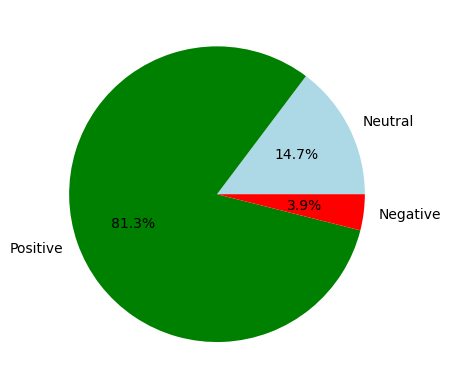

In [43]:
plt.tight_layout()
plt.pie(y,labels = x1, colors = ['lightblue','green','red'],autopct='%1.1f%%')
plt.savefig("description.png")